<a href="https://colab.research.google.com/github/YL-chakradhar/Movie_Genre_Classification/blob/main/movie_gener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd

In [103]:
train_data= pd.read_csv('/content/train_data.csv', sep=":::", header=None, names=['Index', 'Title', 'Genre', 'Description'],engine='python')
train_data.head()

,Index,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [100]:
train_data.isna().sum()

Index          0
Title          0
Genre          0
Description    0
dtype: int64

**DATA CLEANING AND DATAPREPROCESSING**

In [101]:
train_data['Genre'].unique()# what are the unique Geners are present it prints

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [102]:
# prompt: now in Genre column there should be arrange according to index 0 to 26 or :"we can use Label Encoding"..
genre_dict = {}
for i, genre in enumerate(train_data['Genre'].unique()):
  genre_dict[genre] = i
train_data['Genre'] = train_data['Genre'].map(genre_dict)
train_data.head()

,Index,Title,Genre,Description
0,1,Oscar et la dame rose (2009),0,Listening in to a conversation between his do...
1,2,Cupid (1997),1,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",2,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),0,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),0,The film's title refers not only to the un-re...


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**BAR** **CHART**

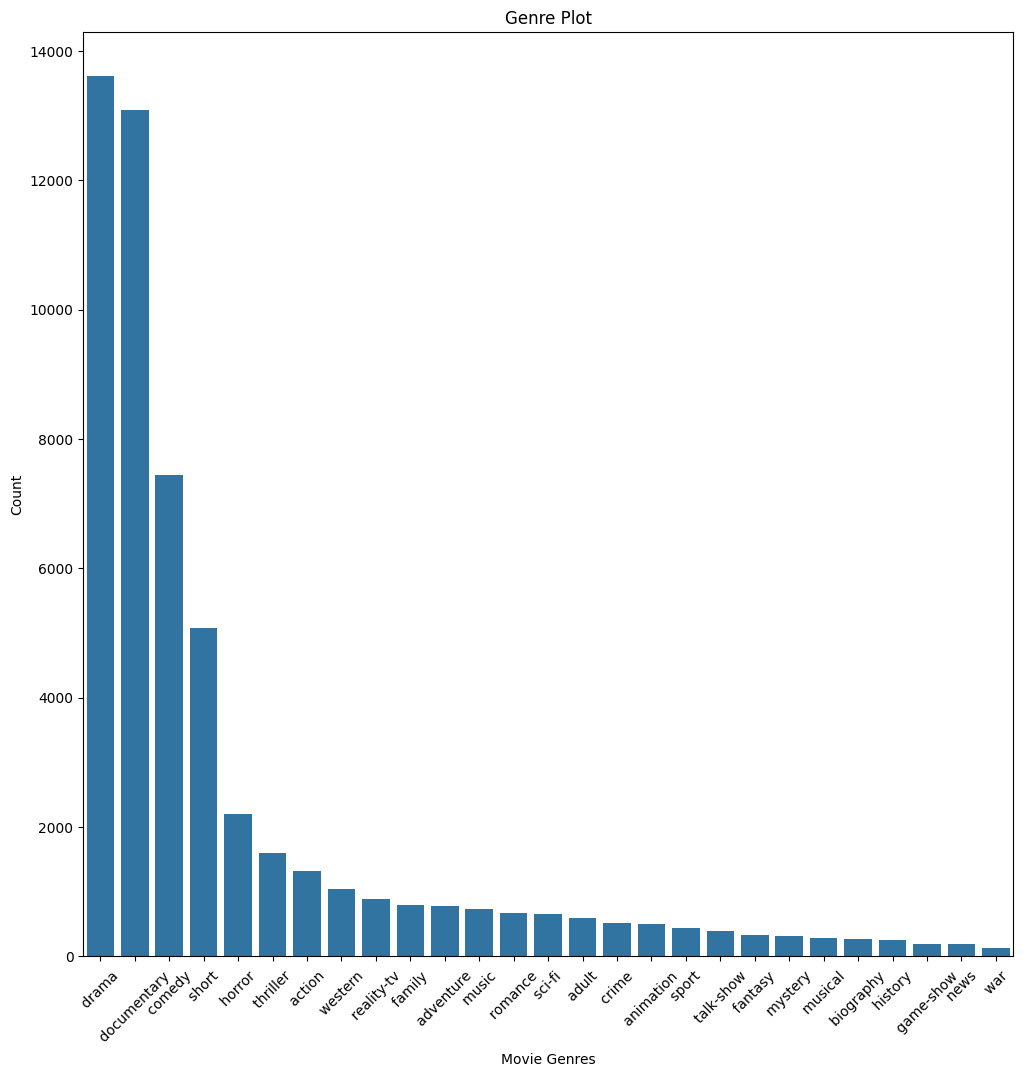

In [97]:
plt.figure(figsize=(12,12))
sns.countplot(x='Genre', data=train_data, order=train_data['Genre'].value_counts().index)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.xticks(rotation=45)
plt.show()

In [62]:
import re
import nltk

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [65]:
corpus=[]
train_data['Description'].fillna("", inplace=True)
train_data.drop('Index',axis=1,inplace=True)
ps=PorterStemmer()
data1=train_data.head(10000)
for i in range(0,data1.shape[0]):
        text=re.sub(pattern='[^a-zA-Z]',repl=" ",string=data1['Description'][i])
        text=text.lower()
        words=text.split()
        cleaned_words=[word for word in words if word not in set(stopwords.words('english'))]
        words=[ps.stem(word) for word in cleaned_words]
        words1=' '.join(words)
        corpus.append(words1)

**BAG** **OF** **WORDS**

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [69]:
data2=train_data['Genre'].head(10000)
y=data2.values

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 10000), X_test size: (2000, 10000)


**NAIVE**-**BAYES**  **IS** **USED** **FOR** **THIS** **MOVIE** **GENRE**

In [71]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.1)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [72]:
y_pred=classifier.predict(X_test)
y_pred

array([ 4,  3, 23, ...,  3,  7,  3])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5135

In [74]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, y_pred)

**PREDICTING THE GENRE ACCORDING TO THE DESCRIPTION**

In [77]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)
  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [85]:
test=pd.read_csv('/content/test_data.csv',sep=":::", header=None, names=['Index', 'Title','Description'],engine='python')
test.drop('Index',axis=1,inplace=True)
test.drop('Title',axis=1,inplace=True)
test.head()

,Description
0,"L.R. Brane loves his life - his car, his apar..."
1,"Spain, March 1964: Quico is a very naughty ch..."
2,One year in the life of Albin and his family ...
3,"His father has died, he hasn't spoken with hi..."
4,Before he was known internationally as a mart...


In [89]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.Description[row]
print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_dict.keys())[value]))

Script:  Plato's theory about anamnesis ( Reminiscence ) is the essence of this performance. Our soul had the absolute knowledge before the incarnation in what we call Ť our body ť. The soul was living surrounded by pure ideas and truth. During the incarnation process the soul forgets everything and it emerges again to remember everything that it already knew. In Reminiscence we will experience the remembrance of our soul. Reminiscence is the apology of questioning the multidimensionality of our environment and our physical limits.
Prediction:  short 


In [104]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.Description[row]
print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_dict.keys())[value]))

Script:  Hosted by Christine Cushing, Christine Cushing Live was a live cooking show that featured call-in questions and guests from the world of food and entertainment. The series aired (until 2005) weeknights at 6 p.m. EST on Food Network Canada and repeated daily at 8 a.m. and 1 p.m. EST. The series went into repeat sessions for the spring and summer months. It is no longer being aired. It was produced in Canada by the production company Chiffonade Inc.
Prediction:  talk-show 


In [105]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.Description[row]
print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_dict.keys())[value]))

Script:  Four young women from Europe and Asia, recently arrived in England, begin their new jobs as Au Pairs. They quickly find that the English are not as stuffy and staid as they appear, and the young ladies are soon spending more time in bed than on the job.
Prediction:  drama 
